# Empirical Decomposition & Hilbert Transform



## PyEMD
### Links
- HTML documentation: https://pyemd.readthedocs.org
- Issue tracker: https://github.com/laszukdawid/pyemd/issues
- Source code repository: https://github.com/laszukdawid/pyemd

In [27]:
from scipy.signal import hilbert
from PyEMD import EMD

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path
from src.preprocessing import Mohammad_Kachuee_preprocessing

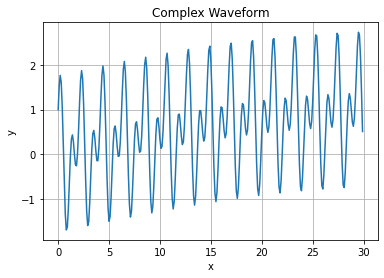

In [28]:
x = np.arange(0, 30, 0.1);
y = np.sin(0.05*x)+np.sin(6*x)+np.cos(3*x)

plt.plot(x,y)
plt.title('Complex Waveform')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [29]:
# Extract imfs and residue
# In case of EMD
emd = EMD()
emd.emd(y)
imfs, res = emd.get_imfs_and_residue()
N = imfs.shape[0]+2

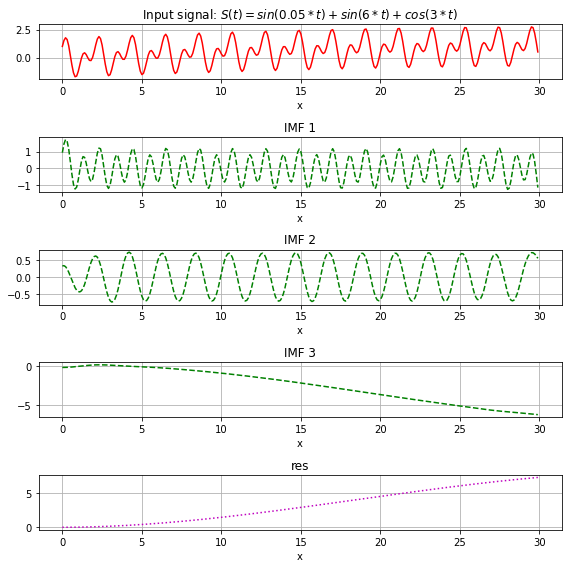

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(N,1,1)
plt.plot(x, y, 'r')
plt.title("Input signal: $S(t)=sin(0.05*t) + sin(6*t) + cos(3*t)$")
plt.xlabel("x")
plt.grid()

for n, imf in enumerate(imfs):
    plt.subplot(N,1,n+2)
    plt.plot(x, imf, '--g')
    plt.title("IMF "+str(n+1))
    plt.grid()
    plt.xlabel("x")

n+=1
plt.subplot(N,1,n+2)
plt.plot(x, res, ':m')
plt.title("res")
plt.grid()
plt.xlabel("x")

plt.tight_layout()
#plt.savefig('simple_example')
plt.show()

Retrieve original signal using IMF summation as below
$$E=r_n(t)\sum\limits_{i=1}^{n}IMF_i(t)$$

Residual of the signal, returned as a column vector or a single data column timetable. residual represents the portion of the original signal X not decomposed by emd.

residual is returned as:

A column vector, when X is a vector.

In [31]:
def invEMD(imfs,res):
    return res + imfs.sum(axis=0)

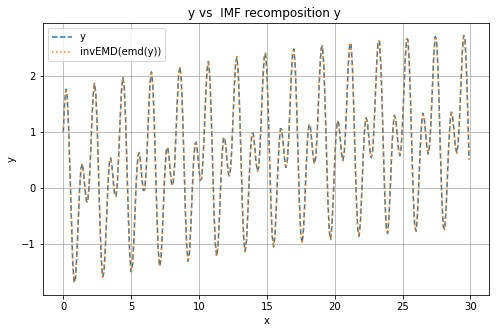

In [32]:
yr = invEMD(imfs,res)

plt.figure(figsize=(8,5))
plt.title('y vs  IMF recomposition y ')
plt.plot(x,y,"--",label = "y")
plt.plot(x,yr,":",label = "invEMD(emd(y))")

#envelope = np.abs(yr)
#plt.plot(x,envelope,label = "envelope")

plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
#np.sum(imfs.sum(axis=0)+res - y )

# Decompose PPG & ABP Signals

In [67]:
fs = 125
fup = 1000
t = np.arange(0,1024*(1/fs), 1/fs,dtype=float)

df = pd.read_csv('./data/fs_125_n_2582992_p001501-2146-12-15-19-05_sec_0.csv')

In [68]:
len(t)

1024

In [69]:
df

,ppg,abp
0,0.534702,66.101738
1,0.534702,65.906171
2,0.534702,65.515036
3,0.534702,64.732767
4,0.534702,64.341633
...,...,...
2582988,0.608993,75.488967
2582989,0.597263,76.075669
2582990,0.586510,76.662371
2582991,0.573803,77.053505


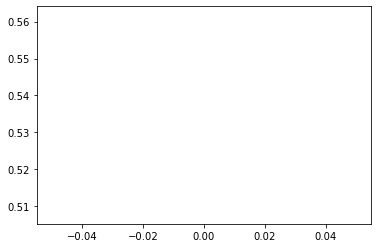

In [75]:
plt.plot(df['ppg'].iloc[])

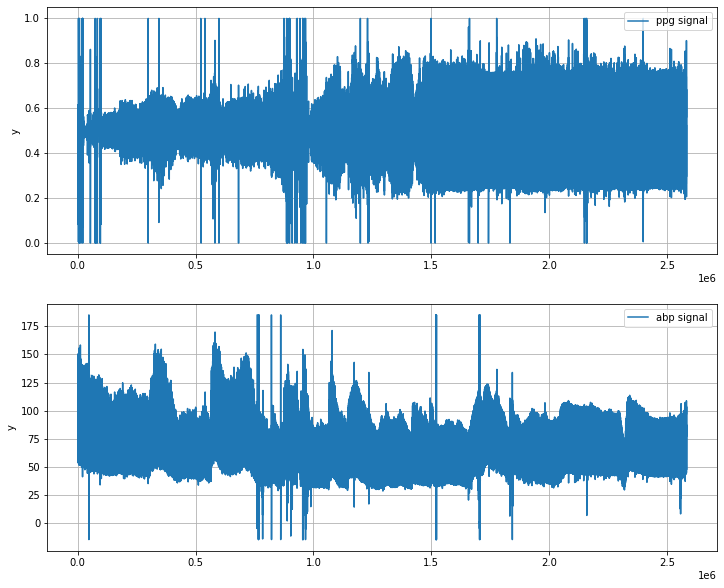

In [70]:
fig, ax = plt.subplots(2, 1,figsize=(12,10))


ax[0].plot(df['ppg'],label = 'ppg signal')

#ax[0].title.set_text('p000188 Random ppg sample 1')
#ax[0].set_xlabel('Time(sec)')
ax[0].set_ylabel('y')
ax[0].legend()
ax[0].grid()

ax[1].plot(df['abp'],label = 'abp signal')
ax[1].set_ylabel('y')
ax[1].legend()
ax[1].grid()


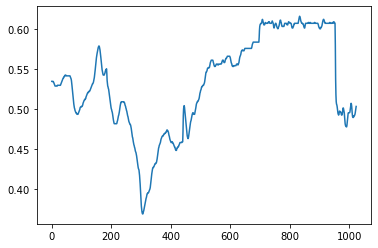

In [51]:
plt.plot(y)

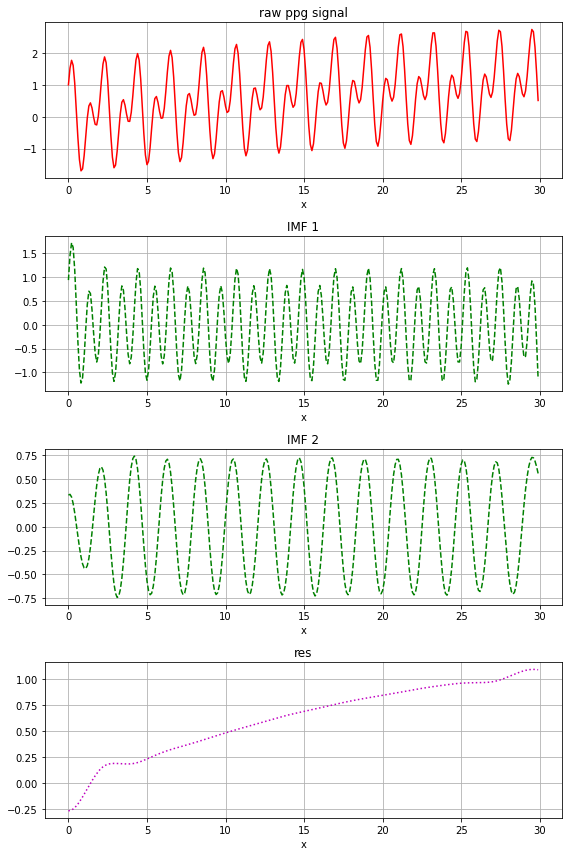

In [65]:
#y = df['ppg'].values[0:1024]
emd = EMD(max_imfs=2)
emd.emd(y,max_imf = 2)
imfs, res = emd.get_imfs_and_residue()
N = imfs.shape[0]+2

plt.figure(figsize=(8,12))
plt.subplot(N,1,1)
plt.plot(x, y, 'r')
plt.title("raw ppg signal")
plt.xlabel("x")
plt.grid()

for n, imf in enumerate(imfs):
    plt.subplot(N,1,n+2)
    plt.plot(x, imf, '--g')
    plt.title("IMF "+str(n+1))
    plt.grid()
    plt.xlabel("x")

n+=1
plt.subplot(N,1,n+2)
plt.plot(x, res, ':m')
plt.title("res")
plt.grid()
plt.xlabel("x")

plt.tight_layout()
#plt.savefig('simple_example')
plt.show()

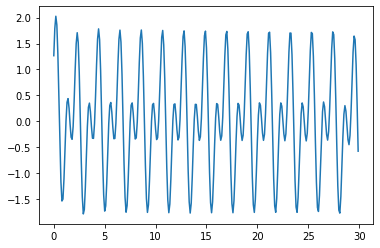

In [66]:
plt.plot(x,imfs.sum(axis=0))

In [52]:
x = np.arange(0, 30, 0.1);
y = np.sin(0.05*x)+np.sin(6*x)+np.cos(3*x)

In [53]:
from PyEMD import EEMD

if __name__ == "__main__":
    
    eemd = EEMD()
    eIMFs = eemd(y,max_imf = 3)
    
    N = eIMFs.shape[0]+2

In [54]:
eIMFs.shape

(4, 300)

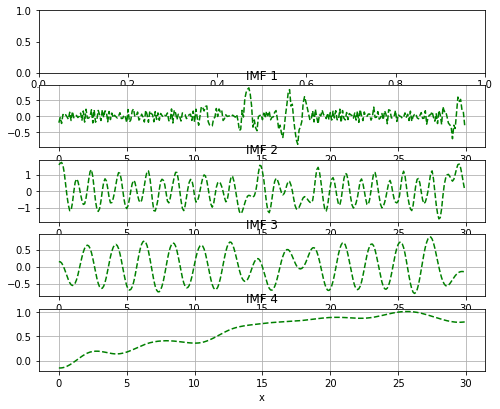

In [56]:
plt.figure(figsize=(8,8))
plt.subplot(N,1,1)

for n, imf in enumerate(eIMFs):
    plt.subplot(N,1,n+2)
    plt.plot(x, imf, '--g')
    plt.title("IMF "+str(n+1))
    plt.grid()
    plt.xlabel("x")

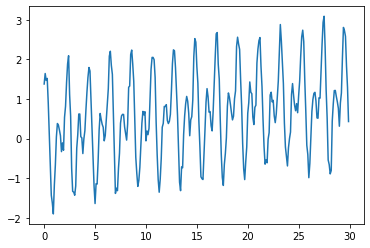

In [60]:
plt.plot(x,eIMFs.sum(axis=0))
#plt.plot(x,y)

In [24]:
y1 = Mohammad_Kachuee_preprocessing(df['ppg'][5000:9000].values,fs,fup) 

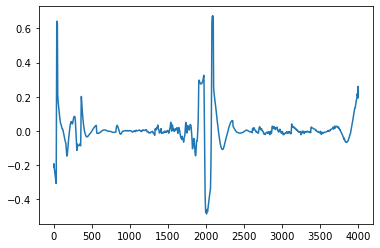

In [25]:
plt.plot(y1)

In [ ]:
emd = EMD(MAX_ITERATION = 2)
emd.emd(y1)
imfs, res = emd.get_imfs_and_residue()
N = imfs.shape[0]+2

plt.figure(figsize=(8,10))
plt.subplot(N,1,1)
plt.plot(t, y1, 'r')
plt.title("filtered ppg signal")
plt.xlabel("x")
plt.grid()

for n, imf in enumerate(imfs):
    plt.subplot(N,1,n+2)
    plt.plot(t, imf, '--g')
    plt.title("IMF "+str(n+1))
    plt.grid()
    plt.xlabel("x")

n+=1
plt.subplot(N,1,n+2)
plt.plot(t, res, ':m')
plt.title("res")
plt.grid()
plt.xlabel("x")

plt.tight_layout()
#plt.savefig('simple_example')
plt.show()